In [1]:
from matplotlib import pyplot as plt
import numpy as np
import re
import glob

import os.path as osp

In [2]:
# import torch
# import torch.nn.functional as F

# src = torch.randn(3, 3)
# print(src)
# pos = F.binary_cross_entropy_with_logits(src, torch.ones_like(src), reduction="none")
# neg = F.binary_cross_entropy_with_logits(src, torch.zeros_like(src), reduction="none")
# # print(pos)
# # print(neg)

# src = torch.randint(0, 2, size=(3, 3))
# alpha = torch.tensor([0.25, 0.75])
# at = alpha.gather(0, src.data.view(-1))
# print(src)
# print(at)
logs = glob.glob("/root/mmyolo/work_dirs/yolo_20230905/*/*.log")
logs = sorted(logs)
print(logs)

['/root/mmyolo/work_dirs/yolo_20230905/20230905_152240/20230905_152240.log', '/root/mmyolo/work_dirs/yolo_20230905/20230905_160800/20230905_160800.log', '/root/mmyolo/work_dirs/yolo_20230905/20230905_165130/20230905_165130.log', '/root/mmyolo/work_dirs/yolo_20230905/20230905_173510/20230905_173510.log', '/root/mmyolo/work_dirs/yolo_20230905/20230905_181701/20230905_181701.log', '/root/mmyolo/work_dirs/yolo_20230905/20230905_185336/20230905_185336.log', '/root/mmyolo/work_dirs/yolo_20230905/20230905_193443/20230905_193443.log', '/root/mmyolo/work_dirs/yolo_20230905/20230905_202023/20230905_202023.log', '/root/mmyolo/work_dirs/yolo_20230905/20230905_210456/20230905_210456.log', '/root/mmyolo/work_dirs/yolo_20230905/20230905_215146/20230905_215146.log', '/root/mmyolo/work_dirs/yolo_20230905/20230905_224047/20230905_224047.log', '/root/mmyolo/work_dirs/yolo_20230905/20230905_232909/20230905_232909.log', '/root/mmyolo/work_dirs/yolo_20230905/20230906_001823/20230906_001823.log', '/root/mmyo

In [3]:

pattern_ap = r"bbox_mAP_copypaste:([ \d.-]+)"
pattern_ar = r"bbox_AR_copypaste:([ \d.-]+)"
pattern_lr = r"lr: ([\d.-]+e[-+]?\d+)"

aps = []
ars = []
lrs = []
        
for log in logs:
    aps_i = []
    ars_i = [] 
    lrs_i = []    
    with open(log, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            ap = re.findall(pattern_ap, line)
            ar = re.findall(pattern_ar, line)
            lr = re.findall(pattern_lr, line)
            if ap:
                aps_i.append(ap[0].split()[1])
            if ar:
                ars_i.append(ar[0].split()[2])
            if lr:
                lrs_i.append(lr[0])


    aps_i = list(map(float, aps_i))
    ars_i = list(map(float, ars_i))
    lrs_i = list(map(float, lrs_i))

    # train前几轮可能ap,ar为空, 比较lr的长度在ap,ar前面补零, 保持epoch一致
    if (diff := len(lrs_i) - len(aps_i)) > 0:
        aps_i = [0] * diff + aps_i
        ars_i = [0] * diff + ars_i

    aps.append(aps_i)
    ars.append(ars_i)
    lrs.append(lrs_i)
    print(log)
    print(f'max precision: {max(aps_i)}, epoch: {aps_i.index(max(aps_i))+1}')
    print(f'max recall: {max(ars_i)}, epoch: {ars_i.index(max(ars_i))+1}')
    print('--------------------------------------------------------')

/root/mmyolo/work_dirs/yolo_20230905/20230905_152240/20230905_152240.log
max precision: 0.912, epoch: 32
max recall: 0.974, epoch: 9
--------------------------------------------------------
/root/mmyolo/work_dirs/yolo_20230905/20230905_160800/20230905_160800.log
max precision: 0.918, epoch: 24
max recall: 0.982, epoch: 9
--------------------------------------------------------
/root/mmyolo/work_dirs/yolo_20230905/20230905_165130/20230905_165130.log
max precision: 0.921, epoch: 31
max recall: 0.973, epoch: 31
--------------------------------------------------------
/root/mmyolo/work_dirs/yolo_20230905/20230905_173510/20230905_173510.log
max precision: 0.918, epoch: 16
max recall: 0.976, epoch: 16
--------------------------------------------------------
/root/mmyolo/work_dirs/yolo_20230905/20230905_181701/20230905_181701.log
max precision: 0.918, epoch: 12
max recall: 0.978, epoch: 12
--------------------------------------------------------
/root/mmyolo/work_dirs/yolo_20230905/20230905_1

mAP和AR变化趋势
学习率变化趋势

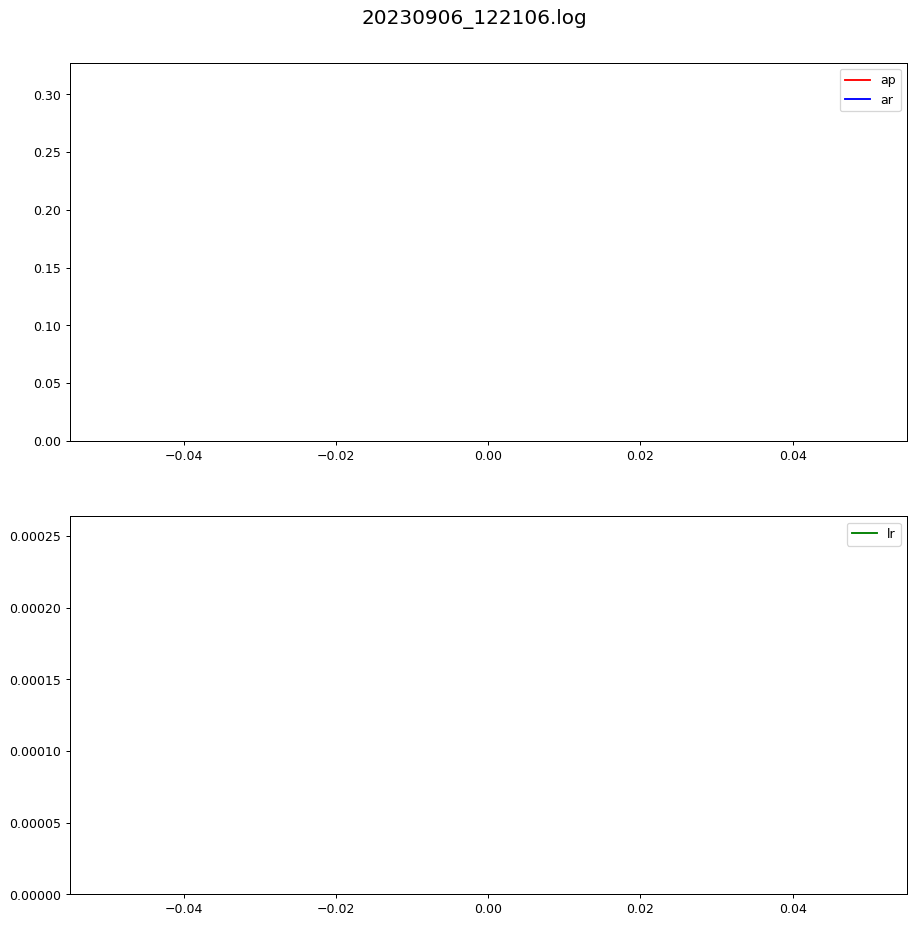

In [4]:
fig = plt.figure(1, dpi=90, figsize=(12, 12))
ax_1 = fig.add_subplot(211)
ax_2 = fig.add_subplot(212)

# 选择precision最高的一组展示
# aps = np.array(aps[:-1])
# runs = np.argmax(np.max(aps, axis=1))
runs = len(aps) - 1
x1 = range(len(lrs[runs]))
ax_1.plot(x1, aps[runs], color='red', label='ap')
ax_1.plot(x1, ars[runs], color='blue', label='ar')
ax_2.plot(x1, lrs[runs], color='green', label='lr')
# pyplot.ylim((-0.5, 150))
# ax.set_aspect('equal', adjustable='box')
# ax.set_xticks(np.arange(0, len(loss), step=3000))
# ax.annotate(f'mAP: {max(aps):.3f}', xy=(x1[aps.index(max(aps))], max(aps)),
#             xytext=(x1[aps.index(max(aps))] + 1, max(aps) + 0.5),
#             arrowprops=dict(facecolor='black', arrowstyle='->'))
fig.suptitle(osp.basename(logs[runs]), fontsize=16, y=0.93)
ax_1.legend()
ax_1.set_ylim(0, None)
ax_2.legend()
ax_2.set_ylim(0, None)
plt.show()